##  ##

## Introduction ##

   In recent years, both the consumer price index (CPI) and real gross domestic product (RGDP) have been increasing, indicating a boom in the economy (Canada, 2023). Therefore, we would also expect an increase in wages in all industries to a certain extent. Meanwhile, the rapid global growth in the field of Science, Technology, Engineering, and Mathematics (STEM) since 2020 globally has attracted many people to the industry (O’Rourke, 2021). Canada, being one of the more developed countries has also been greatly impacted. Both Canadian residents and immigrants have shifted toward the STEM industry. As a result, the question we want to investigate is: **Whether there is a wage difference between residents and non-residents in STEM occupations in Canada**. We will be looking at the Labour Force Survey, 2023 (LFS) data set from Statistic Canada. The survey was conducted in the first quarter of 2023 and includes information about the immigration status, hourly wage, field of occupation and other information of the workers. 

## Preliminary Exploratory Data Analysis ##

In [ ]:
library(tidyverse)
library(broom)
library(repr)
library(digest)
library(infer)
require(gridExtra)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Loading required package: gridExtra


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




In [ ]:
options(repr.plot.width=15, repr.plot.height=7) # Setting options

The following code imports the April 2023 Canadian Labour Force data into the notebook.

In [ ]:
employment <- read_csv("https://raw.githubusercontent.com/GWilliam02/STAT201-Project/main/data/employmentData.csv")

Rows: 108064 Columns: 60
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): SURVMNTH, AGE_12, NAICS_21, NOC_10, NOC_43, WHYLEFTN, EFAMTYPE
dbl (53): REC_NUM, SURVYEAR, LFSSTAT, PROV, CMA, AGE_6, SEX, MARSTAT, EDUC, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [145]:
employment_clean <- employment |>
                    select(NOC_10 ,HRLYEARN,AGE_12) |>
                    filter(!is.na(HRLYEARN)) |>
                    filter(NOC_10 == "03") |>    #Filters out everyone with STEM Occupations
                    filter(AGE_12=="02"|AGE_12=="06") |>
                    select(-NOC_10) |>
                    rename(age_group = AGE_12,
                          hourly_wage = HRLYEARN) |>
                    mutate(age_group = case_when(age_group == "02" ~ "20 to 24yr old",
                                                         age_group == "06" ~ "40 to 44 yr old")
                          ,hourly_wage = hourly_wage/100)
                    
                

head(employment_clean)

hourly_wage,age_group
<dbl>,<chr>
28.85,40 to 44 yr old
76.92,40 to 44 yr old
46.00,40 to 44 yr old
35.90,40 to 44 yr old
32.21,40 to 44 yr old
25.00,20 to 24yr old


In [147]:
nrow(employment)
nrow(employment_clean)


summary_stats <- employment_clean |>
                group_by(age_group) |>
                summarize(count = n(), 
                         mean_wage = mean(hourly_wage),
                         mead_sd = sd(hourly_wage))

summary_stats


[1] 108064

[1] 806

age_group,count,mean_wage,mead_sd
<chr>,<int>,<dbl>,<dbl>
20 to 24yr old,220,26.71486,7.937008
40 to 44 yr old,586,46.05520,16.694721


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



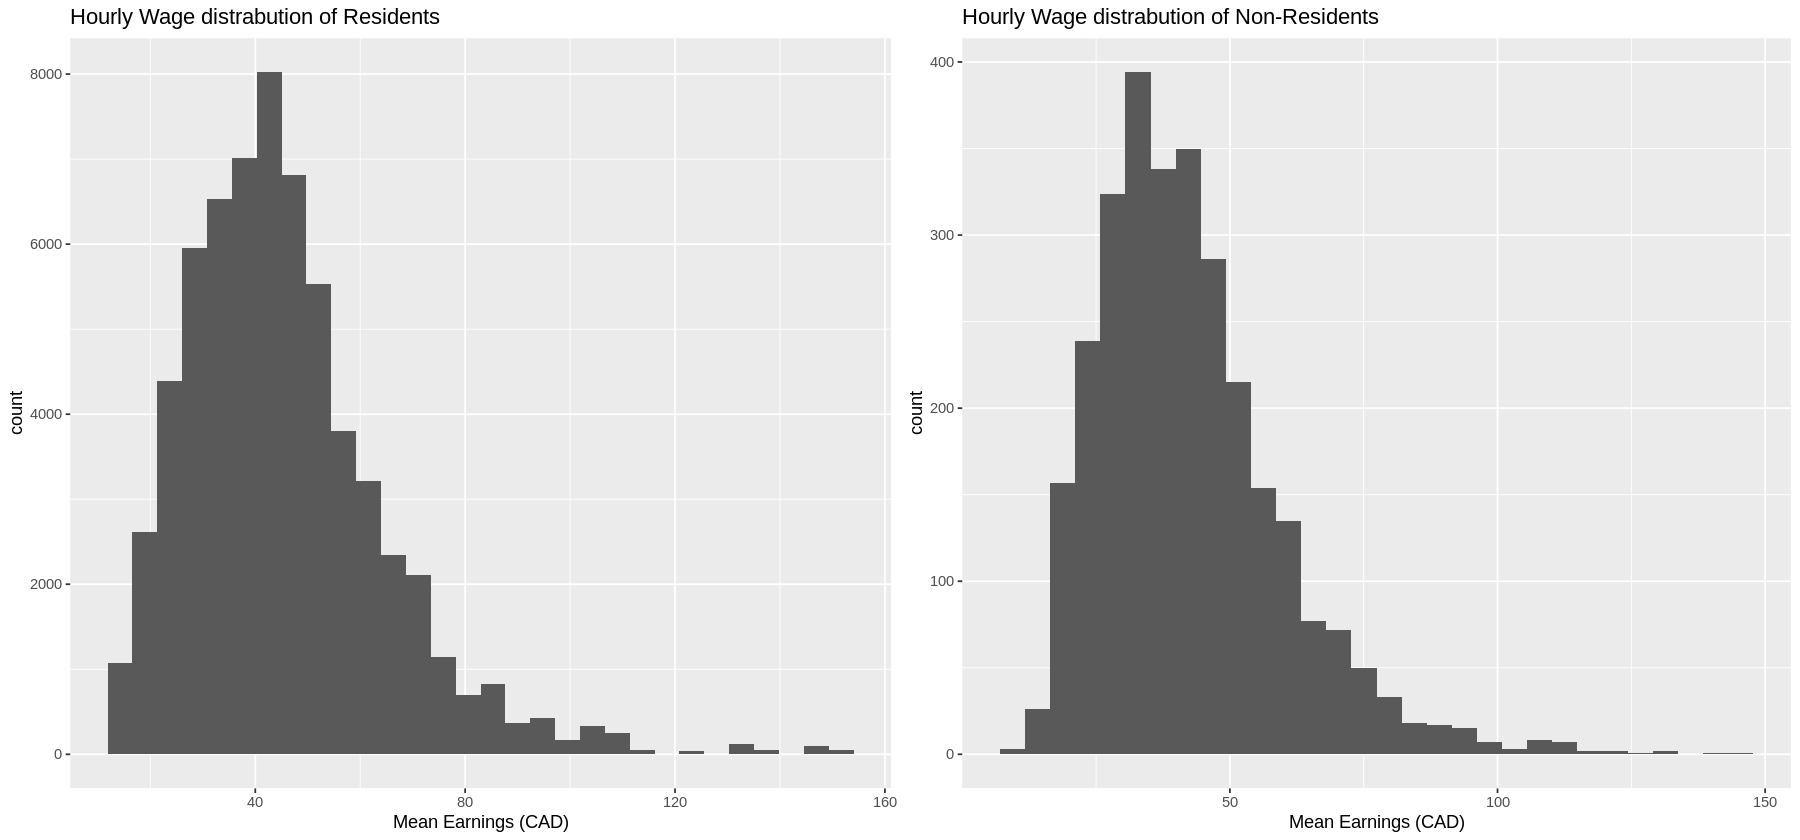

In [148]:
plt_age02 <- employment_clean %>% 
    filter(age_group == "02") %>%
    ggplot() +
    geom_histogram(aes(x=hourly_wage)) +
    ggtitle("Hourly Wage distrabution of 20 to 24yr olds") +
    xlab("Mean Earnings (Dollars CAD)") 
plt_age06 <- employment_clean %>% 
    filter(age_group == "06") %>%
    ggplot() +
    geom_histogram(aes(x=hourly_wage)) +
    ggtitle("Hourly Wage distrabution of 40 to 44yr olds") +
    xlab("Mean Earnings (Dollars CAD)") 
grid.arrange(plt_residant, plt_nonresidant, ncol=2)

In [149]:



age_vs_wage_boxplots <-
    employment_clean %>% 
    ggplot() +
    geom_boxplot(aes(x=age_group, y=hourly_wage, fill = age_group)) +
    theme(text = element_text(size = 22)) +
    ggtitle("Residant vs Non-residant") + 
    xlab("Residance status") + 
    ylab("Earrings (cents)") + 
    guides(fill = FALSE)
age_vs_wage_boxplots

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
ERROR while rich displaying an object: Error in FUN(X[[i]], ...): object 'AGE_12' not found

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, erro